In [91]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [92]:
# MAT 파일 불러오기
mat_path = r"../HW2_package/hw2_prob2.mat"
mat_data = scipy.io.loadmat(mat_path)

# 변수 할당
A = mat_data['A']
d = mat_data['d']
d_up = mat_data['d_up']

In [93]:
# minimum f
def f(x):
    return 0.5 * np.linalg.norm((A @ x - d), 2) 
    
def f_1_differential(x):
    return (A.T @ A @ x - A.T @ d) / (np.sqrt((A @ x - d).T @ (A @ x - d)))

In [94]:
# logarithmic_barrier
def logarithmic_barrier(x):
    return - np.log(-(A @ x - d_up))

def logarithmic_barrier_1_differential(x):
    return A.T @ np.reciprocal(-(A @ x - d_up))

In [95]:
def F(x, t):
    return t * f(x) + logarithmic_barrier(x)
    
def F_1_differential(x, t):
    return t * f_1_differential(x) + logarithmic_barrier_1_differential(x) 

In [99]:
# with inequality constraint
t = 2
xk = np.zeros((A.shape[1], 1))

# 조정 값
alpha = 0.01
beta = 0.8

for idx in range(10000):
    
    delta_x = - F_1_differential(xk, t)
    step_size = 1
    
    #backtracking line search
    while (F(xk + step_size * delta_x, t) > (F(xk, t) + alpha * step_size * F_1_differential(xk, t).T @ delta_x)).any():
        step_size *= beta
    
    xk = xk + step_size * delta_x
    
    print(idx, xk, f(xk))

0 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1644.8201788041047
1 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1644.5568170285403
2 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1644.2934991821905
3 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1644.030225271314
4 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1643.7669953021687
5 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1643.5038092810073
6 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1643.2406672140858
7 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1642.977569107652
8 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1642.714514967956
9 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1642.4515048012447
10 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1642.188538613761
11 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1641.92561641175
12 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1641.6627382014506
13 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1641.399903989101
14 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1641.1371137809372
15 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1640.8743675

In [100]:
# DVH
np.save(r"../HW2_package/xk_with_inequality_constraint.npy", xk)

In [101]:
# without inequality constraint

t = 2
xk_f = np.zeros((A.shape[1], 1))

# 조정 값F
alpha = 0.01
beta = 0.8

for idx in range(10000):
    
    delta_x = - f_1_differential(xk_f)
    step_size = 1

    #backtracking line search
    while f(xk_f + step_size * delta_x) > (f(xk_f) + alpha * step_size * f_1_differential(xk_f).T @ delta_x):
        step_size *= beta
    
    xk_f = xk_f + step_size * delta_x
    
    
    print(idx, xk_f, f(xk_f))

0 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1644.8474617805998
1 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1644.61134427638
2 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1644.3752319915782
3 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1644.1391249278088
4 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1643.9030230866883
5 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1643.6669264698326
6 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1643.430835078859
7 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1643.1947489153852
8 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1642.9586679810297
9 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1642.7225922774103
10 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1642.4865218061482
11 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1642.2504565688632
12 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1642.0143965671762
13 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1641.77834180271
14 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1641.5422922770852
15 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 1641.30624

In [102]:
np.save(r"../HW2_package/xk_without_inequality_constraint.npy", xk_f)

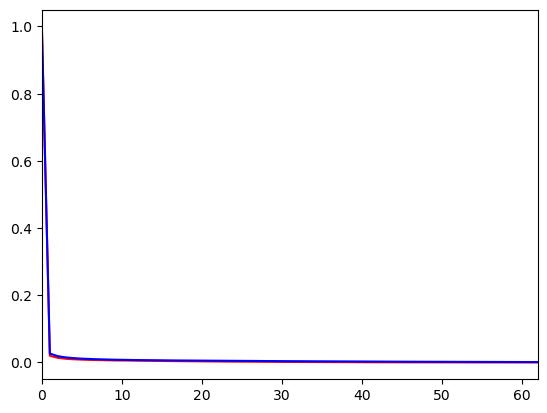

In [110]:
def get_DVH_PTV(PTV, x_beam):
    # Create x-axis array 
    x_ax = np.arange(0, 70.1, 0.1)
    # Calculate the PTV_dummy by multiplying PTV with x_beam broadcasted to the right shape
    PTV_dummy = PTV * np.reshape(x_beam, (-1,))
    # Compute the histogram of PTV_dummy along x_ax
    Dummy_t = np.histogram(PTV_dummy, bins=x_ax)[0]
    # Compute the DVH (Dose Volume Histogram) by flipping and cumulatively summing the histogram
    DVH_t = np.flip(np.cumsum(np.flip(Dummy_t)))
    # Normalize the DVH
    DVH_PTV = DVH_t / np.max(DVH_t)
    return DVH_PTV


x1 = np.load(r"../HW2_package/xk_with_inequality_constraint.npy",)
x2 = np.load(r"../HW2_package/xk_without_inequality_constraint.npy")

# for i in range(len(x1)):
#     print(x1[i], x2[i])
dp1 = get_DVH_PTV(A, x1)
dp2 = get_DVH_PTV(A, x2)


plt.plot(dp1, color = "r")
plt.plot(dp2, color = "b")

plt.xlim((0, 62))
plt.show()